##  VISUALIZACION DE LOS DATOS

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib as plt

In [2]:
#Csv:
df = pd.read_csv("C:/Users/aliso/OneDrive/Escritorio/Mineria de Datos/BaseJugadores.csv",encoding='utf8')

### INFORMACION ESTADISTICA BASICA

In [3]:
df        #Mi base de datos

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,...,2335,1989.0,Aug,"Aug 26, 1989",6-5,196.0,220.0,100.0,United States,Artesia High School
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,...,1978,1990.0,Jul,"Jul 15, 1990",6-3,191.0,195.0,88.0,United States,Oakland High School
2,NBA,2019 - 2020,Regular_Season,Devin Booker,PHX,70,2511.8,627,1283,141,...,1863,1996.0,Oct,"Oct 30, 1996",6-6,198.0,206.0,93.0,United States,Moss Point High School
3,NBA,2019 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,89,...,1857,1994.0,Dec,"Dec 6, 1994",6-11,211.0,242.0,110.0,Greece / Nigeria,NaN
4,NBA,2019 - 2020,Regular_Season,Trae Young,ATL,60,2120.1,546,1249,205,...,1778,1998.0,Sep,"Sep 19, 1998",6-2,188.0,180.0,82.0,United States,Norman High School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53793,NBA,1999 - 2000,Playoffs,John Salley,LAL,18,78.0,5,13,0,...,17,1964.0,May,"May 16, 1964",6-11,211.0,230.0,104.0,United States,Canarsie High School
53794,NBA,1999 - 2000,Playoffs,Muggsy Bogues,TOR,3,87.0,6,21,3,...,16,1965.0,Jan,"Jan 9, 1965",5-3,160.0,136.0,62.0,United States,Dunbar High School
53795,NBA,1999 - 2000,Playoffs,Jerome Williams,DET,3,73.0,7,14,0,...,15,1973.0,May,"May 10, 1973",6-9,206.0,206.0,93.0,United States,Magruder High School
53796,NBA,1999 - 2000,Playoffs,Randy Livingston,PHX,7,63.0,6,27,2,...,14,1975.0,Apr,"Apr 2, 1975",6-4,193.0,209.0,95.0,United States,Isidore Newman School



En las siguientes instrucciones iniciaremos con algunas de las opciones que maneja Pandas para la estadística básica, como por ejemplo:    
    
sum(): Suma todos los elementos de la columna seleccionada.    
mean(): Promedio.    
cumsum(): Suma acumulada de la columna fila por fila.    
describe(): Resumen estadístico de la columna.    
count(): Cuantos elementos no nulos hay en la columna.    
min(), max(): Minimo y máximo de una columna.    
median(), var(), std(): Mediana, varianza y desviación estandar.    
skew(): Valor de asimetría en los datos.    
kurt(): Característica de forma de su distribución de frecuencias/probabilidad.    
corr(): Correlación de los datos    
cov(): Covarianza de los datos. 

PERO PRIMERO OBSERVARE LOS DATOS NUMERICOS CON LOS QUE SE PUEDE TRABAJAR

In [7]:
df.dtypes

League          object
Season          object
Stage           object
Player          object
Team            object
GP               int64
MIN            float64
FGM              int64
FGA              int64
3PM              int64
3PA              int64
FTM              int64
FTA              int64
TOV              int64
PF               int64
ORB              int64
DRB              int64
REB              int64
AST              int64
STL              int64
BLK              int64
PTS              int64
birth_year     float64
birth_month     object
birth_date      object
height          object
height_cm      float64
weight         float64
weight_kg      float64
nationality     object
high_school     object
dtype: object

In [8]:
df.describe(include="all")   #Los que digan Nan no se puede trabajar de las columnas

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
count,53798,53798,53798,53798,53787,53798.000000,53798.000000,53798.000000,53798.000000,53798.000000,...,53798.000000,53479.000000,53479,53479,53724,53724.000000,49232.000000,49232.000000,53791,23551
unique,50,21,3,14574,793,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12,7491,28,NaN,NaN,NaN,539,3101
top,NBA,2019 - 2020,International,Anton Gavel,SAS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Jan,"Jan 29, 1985",6-8,NaN,NaN,NaN,United States,Oak Hill Academy
freq,7490,7116,46308,36,532,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5018,77,5845,NaN,NaN,NaN,18899,261
mean,NaN,NaN,NaN,NaN,NaN,30.365850,753.694277,113.379438,245.480613,28.503086,...,311.660805,1986.346323,NaN,NaN,NaN,197.437607,210.286724,95.411948,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,17.840423,534.242031,100.207990,212.244452,30.692830,...,271.922079,6.636297,NaN,NaN,NaN,8.727599,26.129145,11.851760,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1961.000000,NaN,NaN,NaN,160.000000,130.000000,59.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,17.000000,382.500000,48.000000,109.000000,6.000000,...,134.000000,1982.000000,NaN,NaN,NaN,191.000000,190.000000,86.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,664.300000,89.000000,196.000000,20.000000,...,248.000000,1987.000000,NaN,NaN,NaN,198.000000,209.000000,95.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,955.000000,145.000000,310.000000,41.000000,...,400.000000,1991.000000,NaN,NaN,NaN,203.000000,229.000000,104.000000,NaN,NaN


In [9]:
df["FTM"].sum()    #FTM: Tiros libres realizados del jugador
                   #Entonces nos arroja la suma de todos los tiros libres realizados de esta base de datos

3033527

In [11]:
df["MIN"].mean()  #MIN: Minutos jugados
                  #En promedio cuantos minutos jugador los jugadores en lo que llevan jugando

753.6942767389155

In [16]:
df["FTM"].cumsum()

0            692
1           1152
2           1620
3           2018
4           2499
          ...   
53793    3033522
53794    3033523
53795    3033524
53796    3033524
53797    3033527
Name: FTM, Length: 53798, dtype: int64

In [17]:
df["TOV"].count()   #TOV: Perdidas de balon
                    #Elementos no nulos

53798

In [21]:
x=df["GP"].min()      #GP: Juegos jugados
y=df["GP"].max()      #Juegos minimos y maximos jugados

print("\n Los juegos minimos jugados por algun jugador son:", x)
print("\n Los juegos maximos jugados por algun jugador son:", y)


 Los juegos minimos jugados por algun jugador son: 1

 Los juegos maximos jugados por algun jugador son: 85


In [22]:
df["TOV"].median()   #Mediana de perdida del balon

39.0

In [23]:
df["MIN"].var()      #Varianza de los minutos jugados

285414.5475395958

In [25]:
df["MIN"].std()     #Desviacion estandar de los minutos jugados

534.242030862039

In [26]:
df["GP"].skew()     #Valor de asimetria de los juegos jugados

1.076243219806164

In [27]:
df["TOV"].kurt()    # Caracteristicas de forma de la distribucion de probabilidad de la perdida del balon

7.495989841451291

In [28]:
df.corr()           #Correlacion solo de las que son numericas

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,...,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg
GP,1.000000,0.903411,0.768468,0.784275,0.505266,0.526850,0.637008,0.649060,0.735134,0.884712,...,0.742023,0.723802,0.610222,0.707968,0.509791,0.762231,-0.106376,0.046288,0.071491,0.071069
MIN,0.903411,1.000000,0.914324,0.930353,0.604222,0.627247,0.795495,0.799448,0.864697,0.867834,...,0.829791,0.795853,0.740336,0.817350,0.532693,0.915457,-0.148545,0.011624,0.047328,0.046898
FGM,0.768468,0.914324,1.000000,0.983273,0.558713,0.572375,0.876723,0.879696,0.861126,0.761881,...,0.831294,0.802566,0.687897,0.750794,0.543978,0.991159,-0.108526,0.087008,0.121808,0.121261
FGA,0.784275,0.930353,0.983273,1.000000,0.637401,0.663375,0.867553,0.859306,0.874324,0.758598,...,0.793436,0.751872,0.729936,0.775932,0.484531,0.985730,-0.110625,0.013697,0.050712,0.050186
3PM,0.505266,0.604222,0.558713,0.637401,1.000000,0.983640,0.445539,0.381907,0.500612,0.399078,...,0.307316,0.217056,0.552013,0.548987,0.006858,0.621787,-0.029836,-0.276117,-0.272436,-0.272470
3PA,0.526850,0.627247,0.572375,0.663375,0.983640,1.000000,0.466035,0.406373,0.536076,0.420019,...,0.325194,0.233787,0.581066,0.584538,0.012819,0.634487,-0.014079,-0.292667,-0.287091,-0.287057
FTM,0.637008,0.795495,0.876723,0.867553,0.445539,0.466035,1.000000,0.983621,0.831519,0.665122,...,0.724829,0.697551,0.654839,0.681306,0.465218,0.914402,-0.136291,0.048788,0.093984,0.093142
FTA,0.649060,0.799448,0.879696,0.859306,0.381907,0.406373,0.983621,1.000000,0.838862,0.694035,...,0.767005,0.751836,0.626807,0.681721,0.527057,0.905839,-0.130583,0.097070,0.145182,0.144381
TOV,0.735134,0.864697,0.861126,0.874324,0.500612,0.536076,0.831519,0.838862,1.000000,0.758118,...,0.730624,0.694614,0.808178,0.788321,0.436437,0.872435,-0.117846,-0.066240,0.000455,-0.000163
PF,0.884712,0.867834,0.761881,0.758598,0.399078,0.420019,0.665122,0.694035,0.758118,1.000000,...,0.783215,0.782426,0.539104,0.694898,0.589736,0.751497,-0.143657,0.140546,0.170985,0.170693


In [29]:
df.cov()           #Covarianza solo de las que son numericas 

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,...,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg
GP,318.280710,8610.500019,1373.831197,2969.681238,276.669819,758.705259,673.618456,882.496372,490.541216,720.017618,...,1120.805609,1515.202353,797.340711,278.909548,165.680042,3697.740079,-12.609519,7.208924,34.143322,15.395389
MIN,8610.500019,285414.547540,48948.624271,105492.630466,9907.662472,27049.423626,25190.668947,32550.006060,17278.507356,21150.018174,...,37533.094232,49890.357907,28967.933364,9642.524730,5184.275533,132990.472321,-527.254772,54.207014,676.589710,304.102406
FGM,1373.831197,48948.624271,10041.641310,20912.828099,1718.415312,4629.824289,5207.498018,6718.275869,3227.551677,3482.774947,...,7052.849759,9436.879429,5048.668289,1661.374064,993.017650,27007.867818,-72.278776,76.111954,327.184589,147.739254
FGA,2969.681238,105492.630466,20912.828099,45047.707331,4152.273662,11365.189281,10914.320790,13899.752674,6940.851664,7344.868379,...,14257.917682,18725.157333,11346.764090,3636.676119,1873.400887,56890.385063,-156.050874,25.378315,288.832662,129.649956
3PM,276.669819,9907.662472,1718.415312,4152.273662,942.049798,2436.993874,810.562749,893.342589,574.701888,558.766938,...,798.600318,781.725188,1240.901429,372.086045,3.834341,5189.467039,-6.084750,-73.982829,-223.535749,-101.404880
3PA,758.705259,27049.423626,4629.824289,11365.189281,2436.993874,6515.721983,2229.792539,2499.938638,1618.497122,1546.628829,...,2222.444301,2214.353513,3435.241588,1041.929019,18.849519,13926.712024,-7.550706,-206.234981,-618.878505,-280.679373
FTM,673.618456,25190.668947,5207.498018,10914.320790,810.562749,2229.792539,3513.406377,4443.394841,1843.487577,1798.463855,...,3637.538844,4851.606561,2842.821133,891.766540,502.335874,14738.248294,-53.690613,25.245746,149.456830,67.184350
FTA,882.496372,32550.006060,6718.275869,13899.752674,893.342589,2499.938638,4443.394841,5808.258707,2391.208551,2412.905510,...,4949.127322,6723.439236,3498.709148,1147.292892,731.735560,18772.337060,-66.140315,64.582840,296.741213,133.854161
TOV,490.541216,17278.507356,3227.551677,6940.851664,574.701888,1618.497122,1843.487577,2391.208551,1398.969102,1293.530987,...,2313.692880,3048.546594,2213.919023,651.105915,297.371445,8873.230763,-29.286447,-21.628273,0.454347,-0.073700
PF,720.017618,21150.018174,3482.774947,7344.868379,558.766938,1546.628829,1798.463855,2412.905510,1293.530987,2080.998683,...,3024.993637,4188.175374,1801.187736,700.005499,490.079912,9321.972516,-43.522158,55.962621,208.068462,94.215566


In [31]:
%matplotlib inline
df.head(5)       #Primeros 5 filas

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,...,2335,1989.0,Aug,"Aug 26, 1989",6-5,196.0,220.0,100.0,United States,Artesia High School
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,...,1978,1990.0,Jul,"Jul 15, 1990",6-3,191.0,195.0,88.0,United States,Oakland High School
2,NBA,2019 - 2020,Regular_Season,Devin Booker,PHX,70,2511.8,627,1283,141,...,1863,1996.0,Oct,"Oct 30, 1996",6-6,198.0,206.0,93.0,United States,Moss Point High School
3,NBA,2019 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,89,...,1857,1994.0,Dec,"Dec 6, 1994",6-11,211.0,242.0,110.0,Greece / Nigeria,NaN
4,NBA,2019 - 2020,Regular_Season,Trae Young,ATL,60,2120.1,546,1249,205,...,1778,1998.0,Sep,"Sep 19, 1998",6-2,188.0,180.0,82.0,United States,Norman High School


In [32]:
df.columns    #Columnas de la base de datos

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school'],
      dtype='object')

In [37]:
df.League.unique()

array(['NBA', 'Euroleague', 'Israeli-BSL', 'Argentinian-Liga-A',
       'Australian-NBL', 'Austrian-A-Bundesliga', 'Balkan-BIL',
       'Belarusian-BPL', 'Belgium-Scooore-League', 'Bosnian-BiH-Liga',
       'Brazilian-NBB', 'British-BBL', 'Bulgarian-NBL', 'Canadian-NBL',
       'Chinese-CBA', 'Croatian-A-1-Liga', 'Czech-NBL',
       'Danish-Basketligaen', 'Estonian-Latvian-Basketball-League',
       'Eurocup', 'FIBA-Europe-Cup', 'Finnish-Korisliiga',
       'French-Jeep-Elite', 'Georgian-Super-Liga', 'German-BBL',
       'Greek-HEBA-A1', 'Hungarian-NBIA', 'Italian-Lega-Basket-Serie-A',
       'Japanese-BLeague', 'Kosovo-FBK', 'Lebanese-Division-A',
       'Lithuanian-LKL', 'Luxembourg-Total-League',
       'Macedonian-Superleague', 'Mexican-LNBP', 'Netherlands-DBL',
       'New-Zealand-NBL', 'Norwegian-BLNO', 'Polish-TBL',
       'Romanian-Divizia-A', 'Serbian-KLS', 'Slovakian-Extraliga',
       'Slovenian-SKL', 'South-Korean-KBL', 'Spanish-ACB',
       'Swedish-Basketligan', 'Swiss-LN

## GRAFICAR DATOS UNIVARIANTES
### Graficas de barras y datos categoricos   
    
Como los datos son aproximadamente 53800 datos en filas cortaremos y solo haremos con Liga Nacional de Baloncesto Profesional de México

In [52]:
mx=df[df["League"]=="Mexican-LNBP"]
mx.to_csv("LigaMXBaloncesto",index=False)
len(mx)

765

In [57]:
ligamx=mx
ligamx.head(10)

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
5052,Mexican-LNBP,2019 - 2020,International,Donald Sims,MICH,47,1379.8,257,493,127,...,856,1987.0,Apr,"Apr 25, 1987",6-1,185.0,170.0,77.0,United States,Fork Union Military Academy
5053,Mexican-LNBP,2019 - 2020,International,David Huertas,FUE,54,1538.3,294,690,114,...,834,1987.0,Jun,"Jun 2, 1987",6-5,196.0,197.0,89.0,Puerto Rico / United States,Arlington Country Day School
5054,Mexican-LNBP,2019 - 2020,International,Jordan Glynn,FUE,54,1694.1,276,542,121,...,773,1989.0,Jun,"Jun 26, 1989",6-7,201.0,225.0,102.0,United States,La Vega High School
5055,Mexican-LNBP,2019 - 2020,International,Lucas Martinez,SOL,52,1306.5,236,494,144,...,719,1990.0,Jul,"Jul 4, 1990",6-2,188.0,190.0,86.0,Argentina / Mexico,NaN
5056,Mexican-LNBP,2019 - 2020,International,Rodney Green,MICH,44,1186.7,257,473,38,...,700,1988.0,Jun,"Jun 24, 1988",6-5,196.0,210.0,95.0,United States,Preparatory Charter School
5057,Mexican-LNBP,2019 - 2020,International,"Kennedy Jones, Jr.",COR,35,1130.9,227,518,62,...,686,NaN,NaN,NaN,6-1,185.0,176.0,80.0,United States,NaN
5058,Mexican-LNBP,2019 - 2020,International,John Flowers,SOL,49,1236.1,240,528,119,...,682,1989.0,Jun,"Jun 13, 1989",6-7,201.0,215.0,98.0,United States,St. Mary's Ryken High School
5059,Mexican-LNBP,2019 - 2020,International,Aaron Harper,HUR,32,1238.0,233,479,106,...,675,1981.0,Mar,"Mar 12, 1981",6-0,183.0,217.0,98.0,United States,Provine High School
5060,Mexican-LNBP,2019 - 2020,International,Jerome Meyinsse,MICH,48,1209.0,245,391,5,...,661,1988.0,Dec,"Dec 18, 1988",6-9,206.0,233.0,106.0,United States,McKinley Senior High School
5061,Mexican-LNBP,2019 - 2020,International,Jordan Williams,ZACA,47,1082.5,226,458,85,...,648,1992.0,Dec,"Dec 13, 1992",6-6,198.0,202.0,92.0,United States,Justin F. Kimball High School


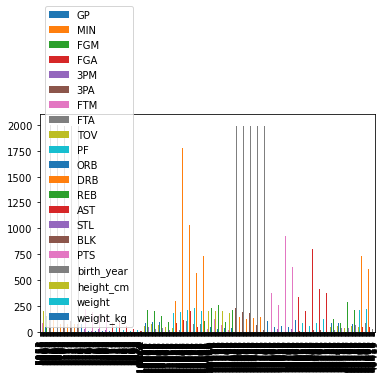

In [58]:
ligamx.plot.bar()

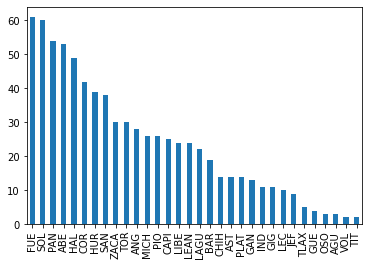

In [65]:
ligamx["Team"].value_counts().plot.bar()       #Liga mexicana de baloncesto por cantidades de jugadores en equipos    
# La mayoria de los jugadores de la Liga Nacional de Baloncesto Profesional de México estan en el equipo FUE (posiblemente fuerza regia)

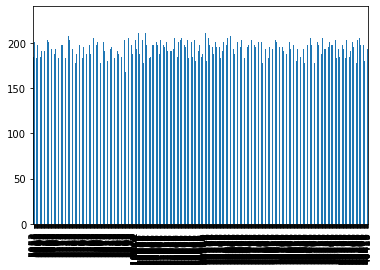

In [61]:
ligamx["height_cm"].plot.bar()

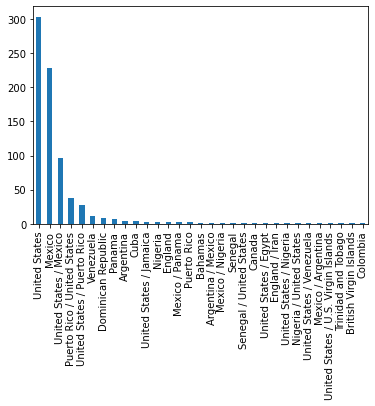

In [66]:
ligamx["nationality"].value_counts().plot.bar()
#La mayoria de los jugadores de esta liga son de EU seguido de Mexico

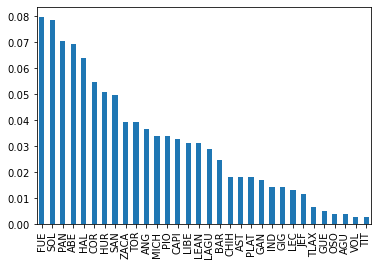

In [72]:
(ligamx['Team'].value_counts()/ len(ligamx)).plot.bar()    #El 8% de los jugadores de esta liga estan en FUE

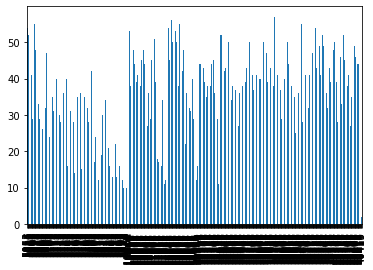

In [77]:
ligamx['GP'].sort_index().plot.bar()

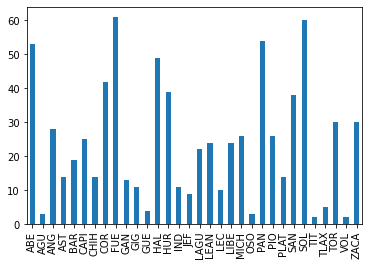

In [79]:
ligamx['Team'].value_counts().sort_index().plot.bar()      #HISTOGRAMA A-Z POR EQUIPOS

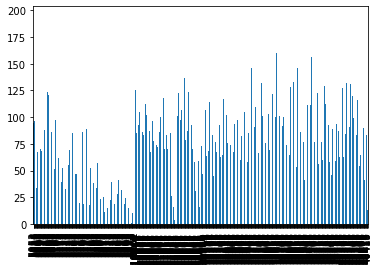

In [81]:
ligamx['PF'].sort_index().plot.bar()

## Como utilice la misma base de datos que la tarea anterior me salte la parte de analizar los datos ya que esta realizado en esa tarea.

## Grafica de lineas.

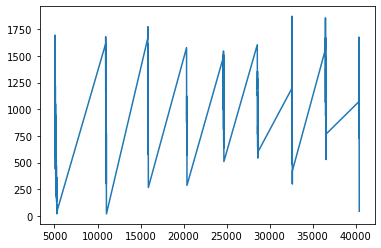

In [82]:
ligamx['MIN'].sort_index().plot.line()

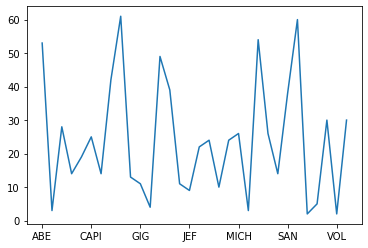

In [85]:
ligamx['Team'].value_counts().sort_index().plot.line()

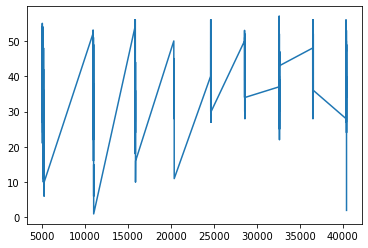

In [86]:
ligamx['GP'].sort_index().plot.line()

In [90]:
ligamx[ligamx['GP']].plot.hexbin(x='GP', y='PTS', gridsize=15)   #no supe como hacerla

KeyError: "None of [Int64Index([47, 54, 54, 52, 44, 35, 49, 32, 48, 47,\n            ...\n            44, 37, 44, 35, 38, 49, 24, 39,  4,  2],\n           dtype='int64', length=765)] are in the [columns]"

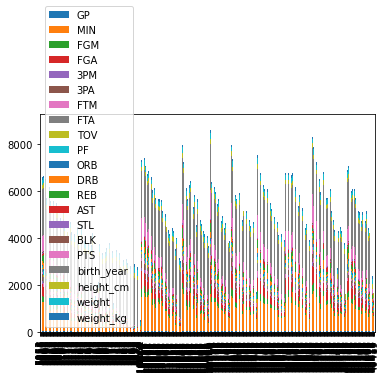

In [91]:
ligamx.plot.bar(stacked=True)

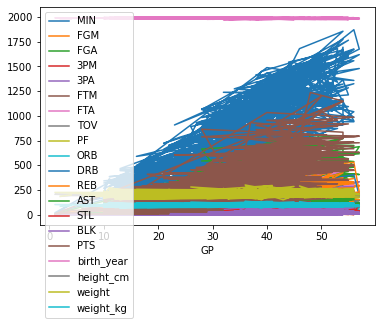

In [92]:
ligamx.plot.line(5)

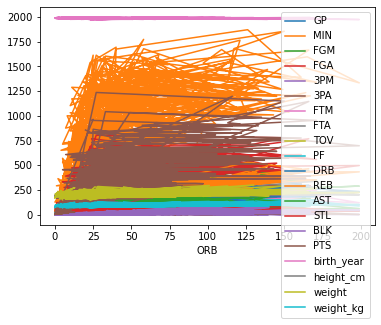

In [93]:
ligamx.plot.line(15)

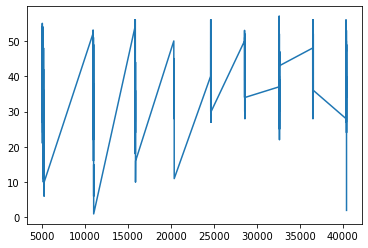

In [95]:
ligamx["GP"].plot.line(5)

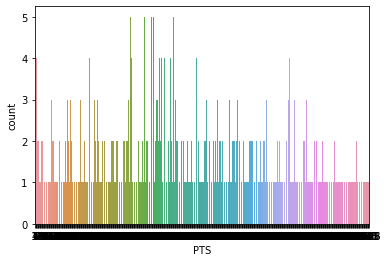

In [97]:
import seaborn as sns
sns.countplot(ligamx['PTS'])

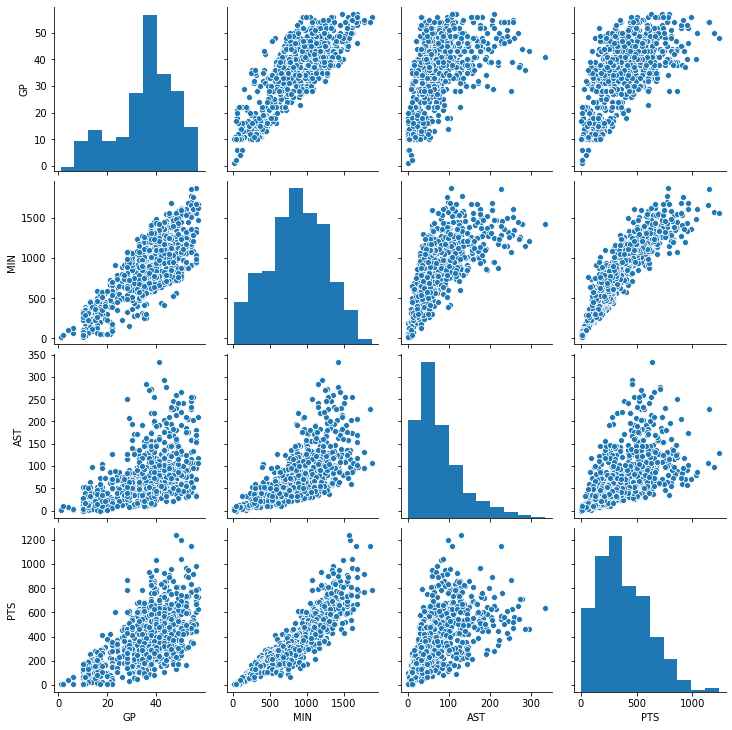

In [99]:
sns.pairplot(ligamx[['GP', 'MIN', 'AST', 'PTS']])

Muchas graficas pueden tener una regresion lineal como pts x min, gp x min